In [1]:
# Load modules

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [84]:
# df_corr = pd.read_csv('./HS4_corr.csv', index_col = (0, 1))
df_logangle = pd.read_csv('./HS4_angle.csv', index_col = (0, 1))

In [92]:
BRA_MIR_exp.loc[BRA_MIR_exp.BRA_MIR_exp < 1]

,level_0,Unnamed: 1,BRA_MIR_exp
1,101.0,102.0,0.188982
2,101.0,103.0,0.000000
3,101.0,105.0,0.218218
4,101.0,106.0,0.133631
5,101.0,201.0,0.062994
6,101.0,202.0,0.183340
7,101.0,203.0,0.000000
8,101.0,206.0,0.119523
9,101.0,207.0,0.000000
10,101.0,209.0,0.000000


In [101]:
df = df_logangle
df_ = df[['FRA_firm_val_exp']].dropna()
FRA_firm_val_exp = df_.loc[df_.FRA_firm_val_exp < 1].nlargest(len(df_)/20, 'FRA_firm_val_exp').reset_index()

df_ = df[['BRA_MIR_exp']].dropna()
BRA_MIR_exp = df_.loc[df_.BRA_MIR_exp < 1].nlargest(len(df_)/20, 'BRA_MIR_exp').reset_index()

df_ = df[['world_exports']].dropna()
world_exports = df_.loc[df_.world_exports < 1].nlargest(len(df_)/20, 'world_exports').reset_index()

edge_dfs = [FRA_firm_val_exp, BRA_MIR_exp, world_exports]

for edge_df in edge_dfs: edge_df.columns = [ 'label_x', 'label_y', 'weight']

In [103]:
# Load info
path = './../compute-corr-structures/data/disagg_struct_refs/formatted/'

HS = pd.read_csv(path+'hs_full.csv').astype(str)
# HS = HS.convert_objects(convert_numeric=True)
HS[[col for col in HS.columns if 'HS ID' in col]] = HS[[col for col in HS.columns if 'HS ID' in col]].astype('float64')
# HS_ref = HS[[col for col in HS.columns if 'ID' in col]]

products_present = np.array(df_corr.index.get_level_values(0).unique())
nodes = pd.DataFrame(products_present, index = range(len(products_present)), columns = ['HS ID HS4'])
nodes = nodes.merge(HS[['HS ID HS4', 'HS label HS4', 'HS ID HS2', 'HS label HS2', 'HS ID HS1']].drop_duplicates())

HS[['HS ID HS1', 'HS label HS1']].drop_duplicates()

,HS ID HS1,HS label HS1
0,1.0,Live Animals; Animal Products
336,2.0,Vegetable Products
640,3.0,Animal Or Vegetable Fats And Oils And Their Cl...
688,4.0,"Prepared Foodstuffs; Beverages, Spirits And Vi..."
899,5.0,Mineral Products
1047,6.0,Products Of The Chemical Or Allied Industries
1834,7.0,Plastics And Articles Thereof; Rubber And Arti...
2045,8.0,"Raw Hides And Skins, Leather, Furskins And Art..."
2114,9.0,Wood And Articles Of Wood; Wood Charcoal; Cork...
2208,10.0,Pulp Of Wood Or Of Other Fibrous Cellulosic Ma...


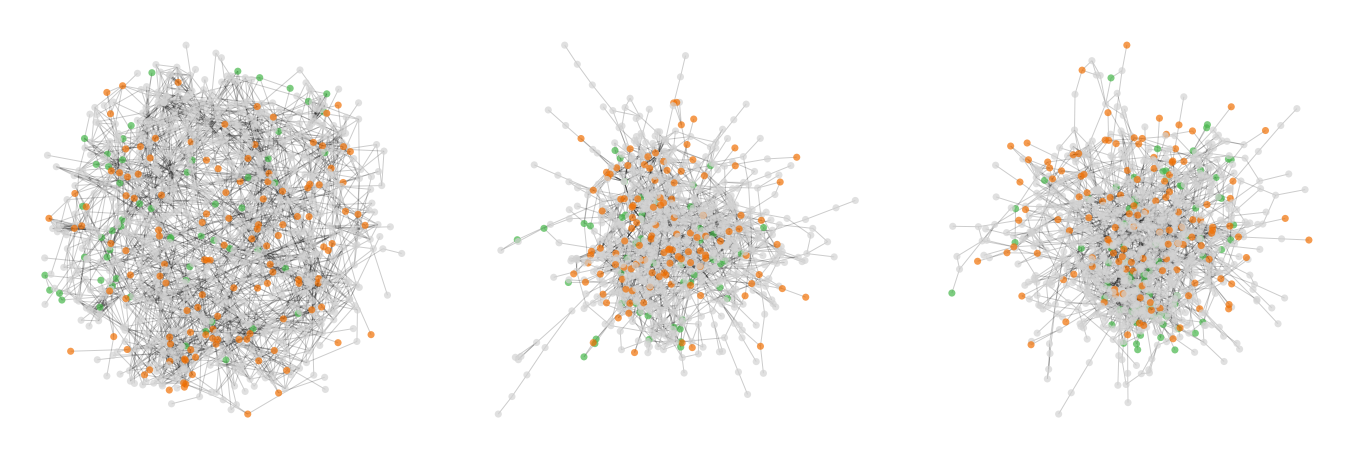

In [106]:
# from collections import OrderedDict
import networkx as nx

edges_str = ['FRA_firm_val_exp', 'BRA_MIR_exp', 'world_exports']
J = len(edges_str)

max_d = 10

k = [.1, .03, .03]

L = 1
for l in range(L):
    fig, axes = plt.subplots(1, J, figsize=(J *8, L * 8),
                         subplot_kw={'xticks': [], 'yticks': []})

    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    
    for j in range(J):
        edg_str = edges_str[j]
        edges = edge_dfs[j]

        
        nodes['color'] = '#D3D3D3' #light grey default
        nodes.loc[nodes['HS ID HS1'] == 2, 'color'] = '#47b74b'
        nodes.loc[nodes['HS ID HS1'] == 16, 'color'] = '#f17105'
#         nodes.loc[nodes['HS ID HS1'].isin([1, 2, 3, 4]), 'color'] = '#47b74b'

#         matchers = ['fabricacion']
#         nodes.loc[[ix for ix in nodes.index if any(xs in ix.lower() for xs in matchers)], 'color'] = '#33a02c' #green

#         matchers = ['comercio']
#         nodes.loc[[ix for ix in nodes.index if any(xs in ix.lower() for xs in matchers)], 'color'] = '#e31a1c' #red

#         matchers = ['agricultura', 'animals', 'agricola', 'food']
#         nodes.loc[[ix for ix in nodes.index if any(xs in ix.lower() for xs in matchers)], 'color'] = '#ff7f00'

#         matchers = ['textil', 'vestir', 'cotton', 'knit', 'footwear', 'handbag', 'cotton']
#         nodes.loc[[ix for ix in nodes.index if any(xs in ix.lower() for xs in matchers)], 'color'] = '#6a3d9a' #violet

#         matchers = ['pesca', 'acuicultura', 'fishi', 'fish ']
#         nodes.loc[[ix for ix in nodes.index if any(xs in ix.lower() for xs in matchers)], 'color'] = '#1f78b4' #blue

#         '#b15928' #brown

        ### Max degree = max_d
        df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight')).reset_index(drop = True)
        df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight')).reset_index(drop = True)
        edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight']).reset_index(drop = True)

        G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight')
#             Main component
        grcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        G=grcc[0]
        # Subset of nodes
        nodes_ss = nodes.loc[nodes['HS ID HS4'].isin(G.nodes())]

        #Perform Graph Drawing
        ax = axes[j]

        #First obtain the node positions using one of the layouts
        nodePos = nx.layout.spring_layout(G, k = k[j])

#         node_bunch = nodes.index.values

        #...filter and draw the subset of nodes with the same symbol in the positions that are now known through the use of the layout.
        nx.draw_networkx_nodes(G, nodePos, nodes = nodes_ss.index, \
                               node_color = nodes_ss.color, node_size = 50, alpha = .7, linewidths = 0, \
                               ax = ax)


        #Finally, draw the edges between the nodes
        nx.draw_networkx_edges(G,nodePos, alpha = .2, ax = ax)

#         ax.set_title(conf_name)
        ax.set_axis_off()
        
    plt.show()




In [66]:
nodes.index

Float64Index([401.0, 701.0, 702.0, 707.0, 708.0, 713.0, 807.0, 903.0, 1105.0], dtype='float64')